# MLP
Cell line 02 HeLa.S3

This notebook uses
lncRNA, canonical, no middle-exclusion, GMM, learning module.

There was no learn fail during CV.

MCC mean 0.2716

In [1]:
SEED = 43
import tensorflow as tf
tf.random.set_seed(SEED) 
tf.keras.backend.set_floatx('float32')
import numpy as np
np.random.seed(SEED) 
from datetime import datetime
print(datetime.now())

2023-04-29 17:34:10.448737


In [2]:
import sys
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    print('GPU device not found')
else:
    print('Found GPU at: {}'.format(device_name))

try:
    from google.colab import drive
    IN_COLAB = True
    print('Running on CoLab')
    PATH='/content/drive/'
    drive.mount(PATH)
    DATA_DIR=PATH+'My Drive/data/Localization/TrainTest/TrainTest_ver43/'  # must end in "/"
    MODEL_DIR=PATH+'My Drive/data/Localization/Models/'  # must end in "/"
    sys.path.append('/content/drive/My Drive/Colab Notebooks')
except:
    IN_COLAB = False
    DATA_DIR="/"
    MODEL_DIR="/"
print(DATA_DIR)
SAVE_MODEL_FILENAME = None # 'MLP'
SAVE_DESCRIM_FILENAME = None # 'GMM'
LOAD_MODEL_FILENAME = None # 'MLP.0.0..model'
LOAD_DESCRIM_FILENAME = None # 'GMM.0.0.pickle'

GPU device not found
Running on CoLab
Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/


In [3]:
from platform import python_version
print('Python',python_version())
import pandas as pd
import scipy.stats as ss
import pickle
import time # sleep function
from os.path import isfile
from matplotlib import pyplot as plt 
import sklearn   # pip install --upgrade scikit-learn
print('sklearn',sklearn.__version__)

from learning import DataLoader, CrossValidator, Separator, ModelBuilder

K=5
ALPHABET=4**K + 1
EPOCHS=300 
EMBED_DIMEN = 4 # arbitrary hyperparameter
RCI_THRESHOLD_MECHANISM = 'RCI_GMM'  # 'RCI_GMM' 'ZERO' 'THE_MEAN'
RCI_THRESHOLD_VALUE = -1  # use -1 for lncRNA, use 0 for mRNA
BREAK = False   # optionally break after first fold
FILTER_TRAIN        = False
FILTER_TAILS_TRAIN  = False
FILTER_MIDDLE_TRAIN = False
FILTER_TEST         = False
FILTER_TAILS_TEST   = False
FILTER_MIDDLE_TEST  = False
MIDDLE_LOW          = -2   # -2 for lncRNA, -1 for mRNA
MIDDLE_HIGH         = 0    #  0 for lncRNA, +1 for mRNA

REPEATS = 2
FOLDS = 5

Python 3.10.11
sklearn 1.2.2


In [4]:
RCI_FILE_TRAIN = 'train.lncRNA_RCI.all_cell_lines.csv'
RCI_FILE_TEST  = None # 'test.lncRNA_RCI.all_cell_lines.csv'

SEQ_FILE_TRAIN = 'train.canon_lncRNA_transcripts.csv'
SEQ_FILE_TEST  = None # 'test.canon_lncRNA_transcripts.csv'

In [5]:
def get_ordered_list():
    ordered_list = \
    ['A549','H1.hESC','HeLa.S3','HepG2','HT1080',\
      'HUVEC','MCF.7','NCI.H460','NHEK','SK.MEL.5',\
      'SK.N.DZ','SK.N.SH','GM12878','K562','IMR.90']
    return ordered_list
all_cell_lines = get_ordered_list()
EXCLUSIONS = [x for x in range(15) if x!=2]   
print('Exclusions',EXCLUSIONS)

Exclusions [0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]


2023-04-29 17:34:13.474980
Load RCI from /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/train.lncRNA_RCI.all_cell_lines.csv
Number of RCI values loaded 1008
Num RCI: 1008
Load sequence from /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/train.canon_lncRNA_transcripts.csv
Loaded 1008 sequences.

Training # 1 1
2023-04-29 17:34:17.651937
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.1.1.validation_genes.txt
Discriminator is GMM
Means [-0.42762567766401927, -2.8553547676688678]
Variances [1.86803689 2.11394771]
Priors [0.55359677 0.44640323]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 0 0 1 1 1 1 1 1 1 1 1]
Train 1:0 468:339 57.99%
Computed class weights: {0: 1.1902654867256637, 1: 0.8621794871794872}
Valid 1:0 106:95 52.74%
FIT


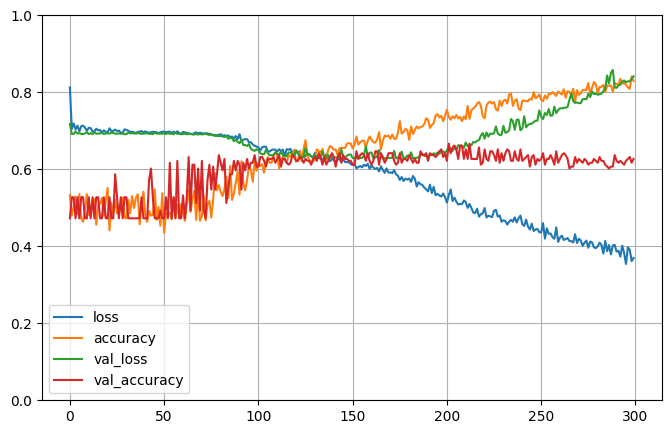


Testing # 1 1
2023-04-29 17:35:41.975531
PREDICT
Test 1:0 106:95 52.74%
Predict 1:0 95:106 47.26%
Test sizes (201, 1025) (201,)
Distrib of scores: 0.5071763 mean 0.32330102 std
Range of scores: 0.0010969951 to 0.998193
Score threshold 0.5
Confusion matrix
 [[63 32]
 [43 63]]
Normalized matrix
 [[0.31343284 0.15920398]
 [0.21393035 0.31343284]]
Extreme scores correct, pos:neg 53 47
Extreme scores incorrect pos:neg 25 31


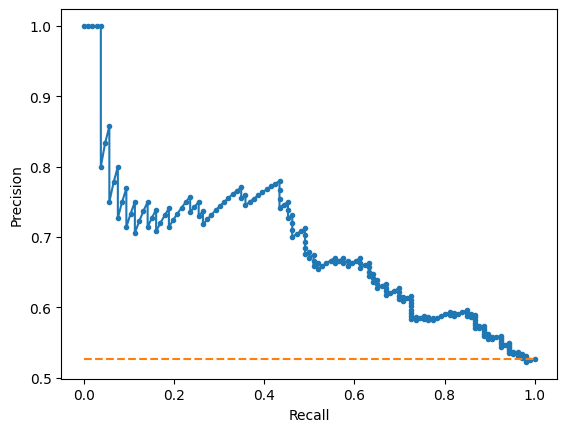

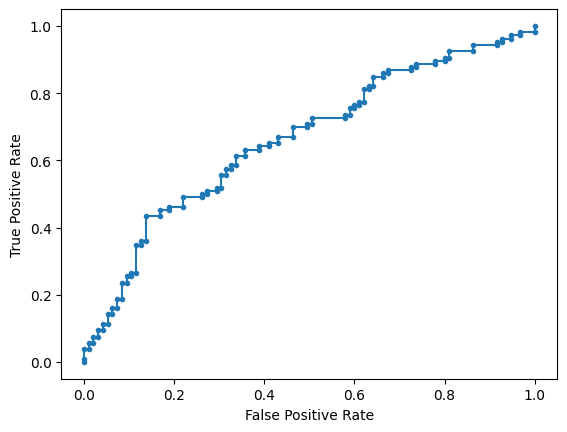

Accuracy: 62.69% Precision: 66.32% Recall: 59.43%
F1: 62.69% MCC: 0.2575
AUPRC: 68.41% AUROC: 66.35%
 accuracy [62.68656716417911]
 precision [66.3157894736842]
 recall [59.43396226415094]
 F1 [62.686567164179095]
 MCC [0.2574975173783515]
 AUPRC [68.41127406921717]
 AUROC [66.34558093346574]

Training # 1 2
2023-04-29 17:35:42.619038
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.1.2.validation_genes.txt
Discriminator is GMM
Means [-2.7627713992078613, -0.3935373996935872]
Variances [1.93362775 1.87438098]
Priors [0.47175999 0.52824001]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 0 0 1 1 1 1 1 1 1 1 1]
Train 1:0 446:376 54.26%
Computed class weights: {0: 1.0930851063829787, 1: 0.92152466367713}
Valid 1:0 97:89 52.15%
FIT


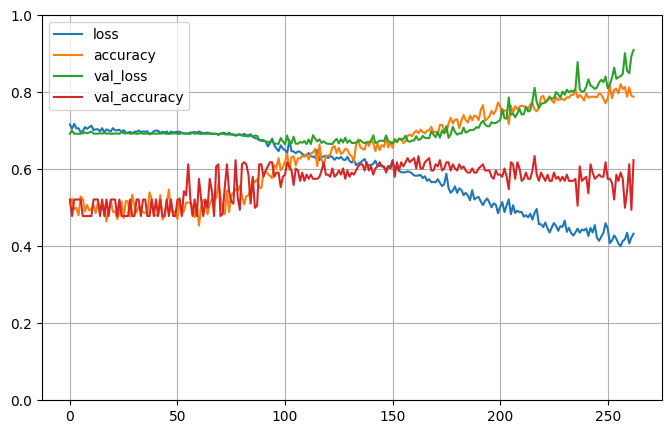


Testing # 1 2
2023-04-29 17:37:06.805987
PREDICT
Test 1:0 97:89 52.15%
Predict 1:0 111:75 59.68%
Test sizes (186, 1025) (186,)
Distrib of scores: 0.5281619 mean 0.19878758 std
Range of scores: 0.04983738 to 0.863428
Score threshold 0.5
Confusion matrix
 [[48 41]
 [27 70]]
Normalized matrix
 [[0.25806452 0.22043011]
 [0.14516129 0.37634409]]
Extreme scores correct, pos:neg 41 30
Extreme scores incorrect pos:neg 20 11


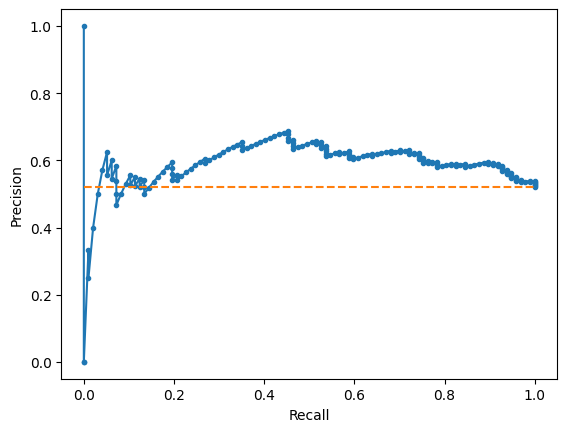

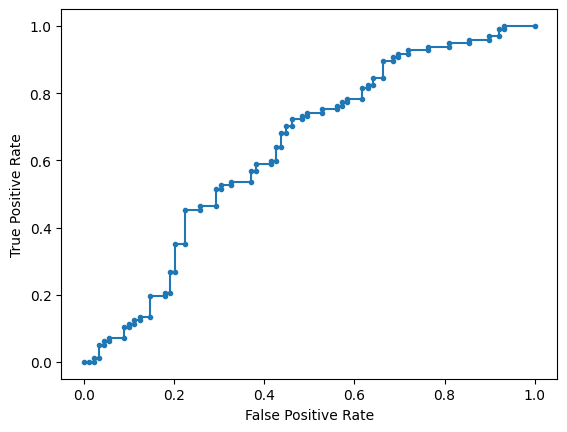

Accuracy: 63.44% Precision: 63.06% Recall: 72.16%
F1: 67.31% MCC: 0.2658
AUPRC: 59.03% AUROC: 63.55%
 accuracy [63.44086021505376]
 precision [63.06306306306306]
 recall [72.16494845360825]
 F1 [67.3076923076923]
 MCC [0.265759134157274]
 AUPRC [59.0295870287445]
 AUROC [63.54685509093015]

Training # 1 3
2023-04-29 17:37:07.492088
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.1.3.validation_genes.txt
Discriminator is GMM
Means [-2.9178577833803123, -0.4401371665422636]
Variances [2.0200402  1.90330136]
Priors [0.44089088 0.55910912]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 0 0 1 1 1 1 1 1 1 1 1]
Train 1:0 464:328 58.59%
Computed class weights: {0: 1.2073170731707317, 1: 0.853448275862069}
Valid 1:0 120:96 55.56%
FIT


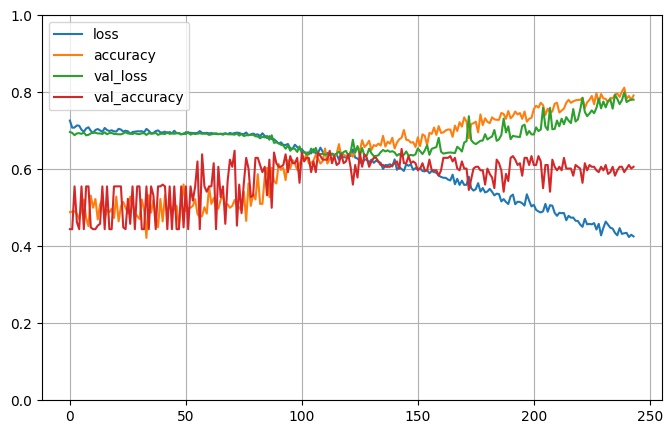


Testing # 1 3
2023-04-29 17:38:32.360762
PREDICT
Test 1:0 120:96 55.56%
Predict 1:0 147:69 68.06%
Test sizes (216, 1025) (216,)
Distrib of scores: 0.56173396 mean 0.16617006 std
Range of scores: 0.081368364 to 0.83374447
Score threshold 0.5
Confusion matrix
 [[45 51]
 [24 96]]
Normalized matrix
 [[0.20833333 0.23611111]
 [0.11111111 0.44444444]]
Extreme scores correct, pos:neg 54 22
Extreme scores incorrect pos:neg 26 8


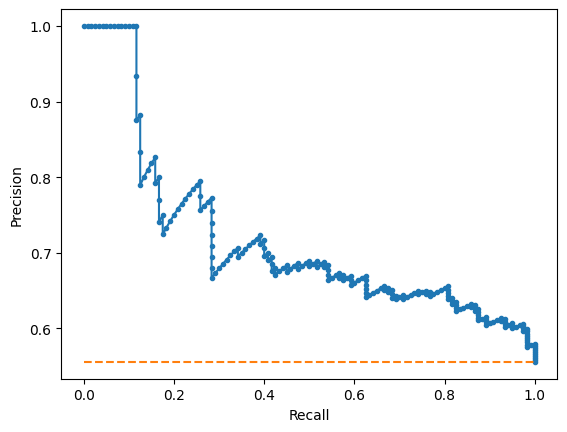

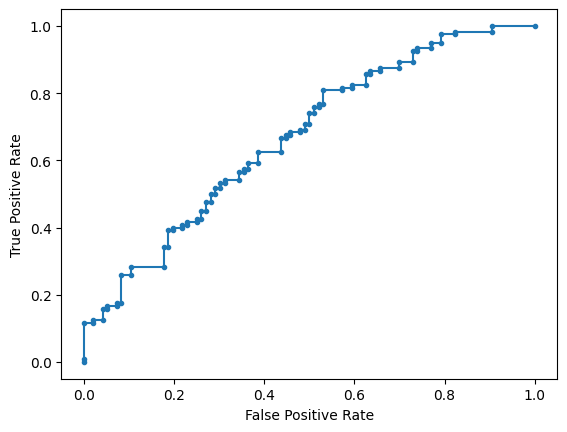

Accuracy: 65.28% Precision: 65.31% Recall: 80.00%
F1: 71.91% MCC: 0.2864
AUPRC: 71.63% AUROC: 66.98%
 accuracy [65.27777777777779]
 precision [65.3061224489796]
 recall [80.0]
 F1 [71.91011235955055]
 MCC [0.2864121911023821]
 AUPRC [71.62906595463674]
 AUROC [66.97916666666666]

Training # 1 4
2023-04-29 17:38:33.368196
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.1.4.validation_genes.txt
Discriminator is GMM
Means [-2.837817959844274, -0.4266121009724478]
Variances [2.13409199 1.98389659]
Priors [0.46836284 0.53163716]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 0 0 1 1 1 1 1 1 1 1 1]
Train 1:0 440:356 55.28%
Computed class weights: {0: 1.1179775280898876, 1: 0.9045454545454545}
Valid 1:0 121:91 57.08%
FIT


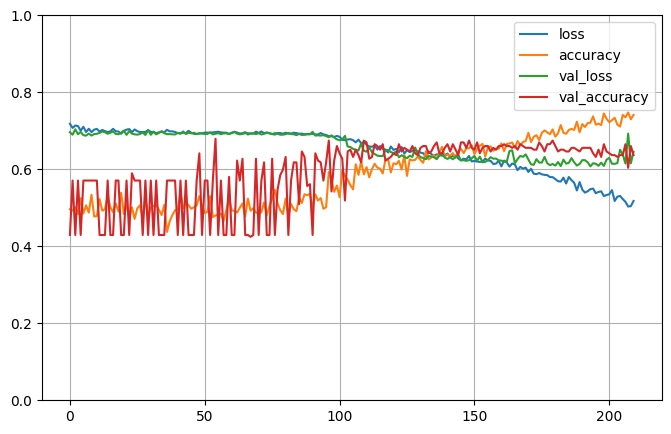


Testing # 1 4
2023-04-29 17:39:16.584521
PREDICT
Test 1:0 121:91 57.08%
Predict 1:0 138:74 65.09%
Test sizes (212, 1025) (212,)
Distrib of scores: 0.526658 mean 0.08099227 std
Range of scores: 0.2803621 to 0.6703886
Score threshold 0.5
Confusion matrix
 [[48 43]
 [26 95]]
Normalized matrix
 [[0.22641509 0.20283019]
 [0.12264151 0.44811321]]
Extreme scores correct, pos:neg 3 4
Extreme scores incorrect pos:neg 4 0


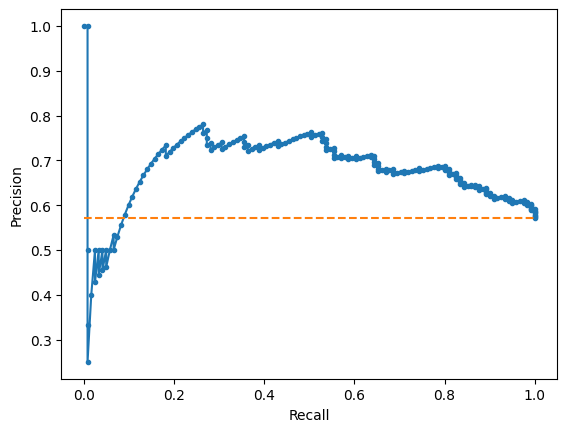

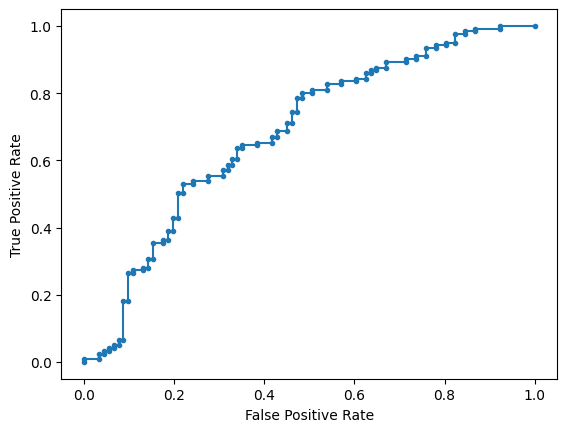

Accuracy: 67.45% Precision: 68.84% Recall: 78.51%
F1: 73.36% MCC: 0.3246
AUPRC: 68.08% AUROC: 68.15%
 accuracy [67.45283018867924]
 precision [68.84057971014492]
 recall [78.51239669421489]
 F1 [73.35907335907336]
 MCC [0.32459519122803143]
 AUPRC [68.07680030339986]
 AUROC [68.15003178639543]

Training # 1 5
2023-04-29 17:39:17.162793
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.1.5.validation_genes.txt
Discriminator is GMM
Means [-2.7025289010342988, -0.3442943575186253]
Variances [2.01243163 1.83380477]
Priors [0.52592607 0.47407393]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 0 0 0 1 1 1 1 1 1 1 1]
Train 1:0 388:427 47.61%
Computed class weights: {0: 0.9543325526932084, 1: 1.050257731958763}
Valid 1:0 110:83 56.99%
FIT


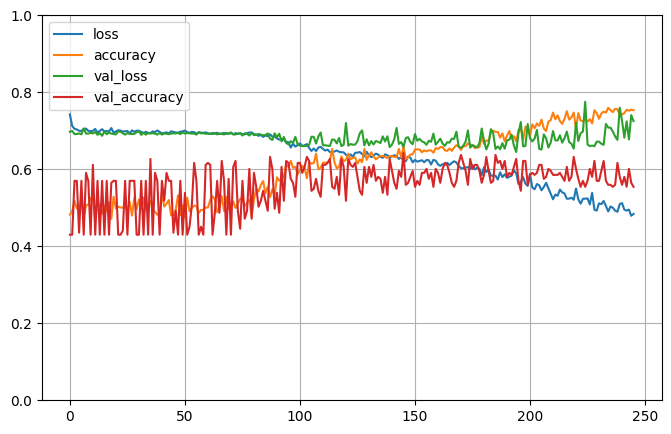


Testing # 1 5
2023-04-29 17:39:58.701158
PREDICT
Test 1:0 110:83 56.99%
Predict 1:0 129:64 66.84%
Test sizes (193, 1025) (193,)
Distrib of scores: 0.5450038 mean 0.15489241 std
Range of scores: 0.1339059 to 0.81674993
Score threshold 0.5
Confusion matrix
 [[39 44]
 [25 85]]
Normalized matrix
 [[0.20207254 0.22797927]
 [0.12953368 0.44041451]]
Extreme scores correct, pos:neg 39 18
Extreme scores incorrect pos:neg 18 9


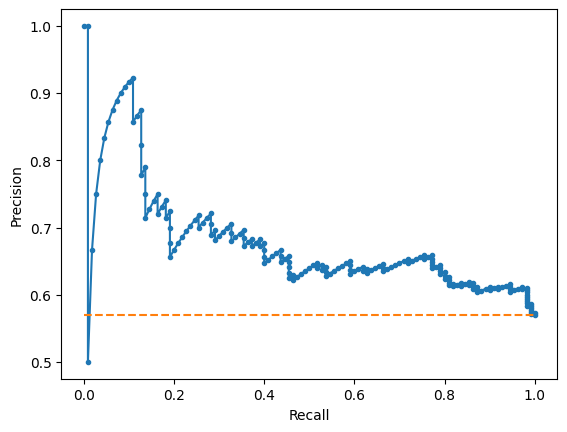

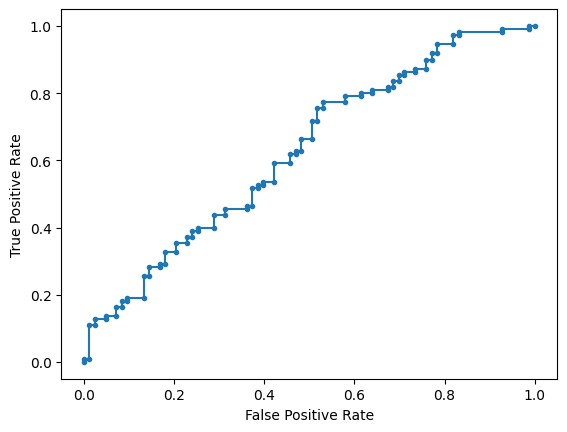

Accuracy: 64.25% Precision: 65.89% Recall: 77.27%
F1: 71.13% MCC: 0.2551
AUPRC: 67.79% AUROC: 62.65%
 accuracy [64.24870466321244]
 precision [65.89147286821705]
 recall [77.27272727272727]
 F1 [71.1297071129707]
 MCC [0.2551252831062938]
 AUPRC [67.78978906990369]
 AUROC [62.650602409638545]

Training # 2 1
2023-04-29 17:39:59.274442
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.2.1.validation_genes.txt
Discriminator is GMM
Means [-0.37128910784617875, -2.7462257887761887]
Variances [1.88358616 1.95782327]
Priors [0.52288574 0.47711426]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 0 0 1 1 1 1 1 1 1 1 1]
Train 1:0 436:379 53.50%
Computed class weights: {0: 1.075197889182058, 1: 0.9346330275229358}
Valid 1:0 100:93 51.81%
FIT


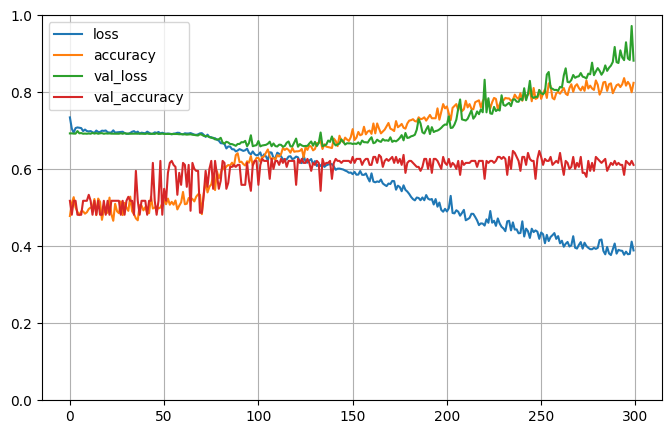


Testing # 2 1
2023-04-29 17:41:23.247610
PREDICT
Test 1:0 100:93 51.81%
Predict 1:0 109:84 56.48%
Test sizes (193, 1025) (193,)
Distrib of scores: 0.55417764 mean 0.3283973 std
Range of scores: 0.000459982 to 0.9924628
Score threshold 0.5
Confusion matrix
 [[51 42]
 [33 67]]
Normalized matrix
 [[0.2642487  0.21761658]
 [0.17098446 0.34715026]]
Extreme scores correct, pos:neg 56 37
Extreme scores incorrect pos:neg 32 25


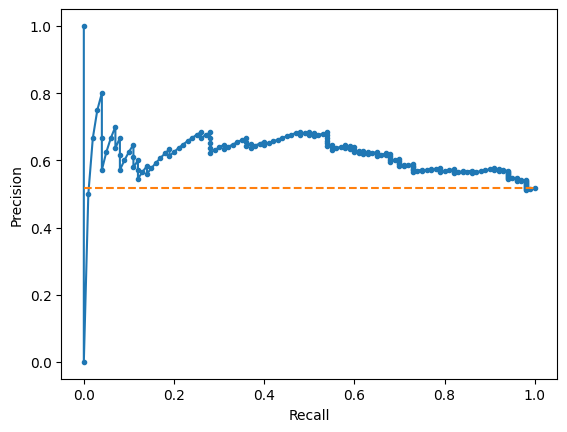

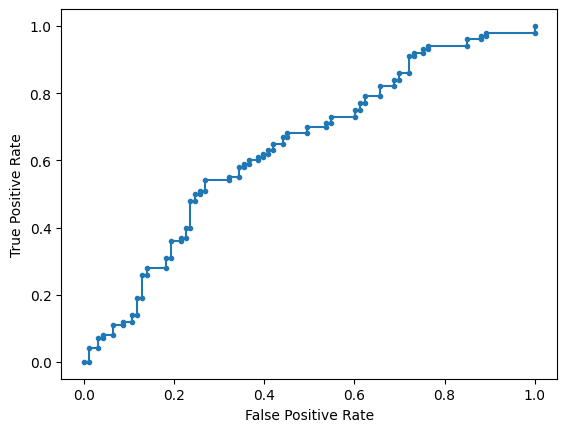

Accuracy: 61.14% Precision: 61.47% Recall: 67.00%
F1: 64.11% MCC: 0.2201
AUPRC: 61.41% AUROC: 63.88%
 accuracy [61.13989637305699]
 precision [61.46788990825688]
 recall [67.0]
 F1 [64.11483253588517]
 MCC [0.220097726802036]
 AUPRC [61.40630405393429]
 AUROC [63.88172043010753]

Training # 2 2
2023-04-29 17:41:23.843257
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.2.2.validation_genes.txt
Discriminator is GMM
Means [-2.864784581132128, -0.44216229743737473]
Variances [1.92996799 1.8666371 ]
Priors [0.46458491 0.53541509]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 0 0 1 1 1 1 1 1 1 1 1]
Train 1:0 456:368 55.34%
Computed class weights: {0: 1.1195652173913044, 1: 0.9035087719298246}
Valid 1:0 110:74 59.78%
FIT


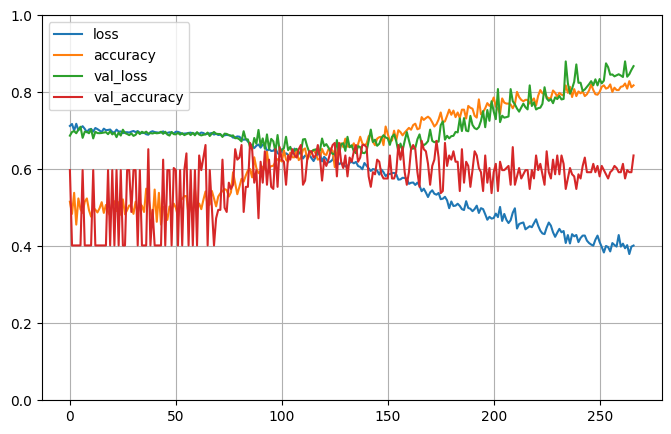


Testing # 2 2
2023-04-29 17:42:08.351035
PREDICT
Test 1:0 110:74 59.78%
Predict 1:0 146:38 79.35%
Test sizes (184, 1025) (184,)
Distrib of scores: 0.66020393 mean 0.19240013 std
Range of scores: 0.07766204 to 0.94653213
Score threshold 0.5
Confusion matrix
 [[26 48]
 [12 98]]
Normalized matrix
 [[0.14130435 0.26086957]
 [0.06521739 0.5326087 ]]
Extreme scores correct, pos:neg 76 10
Extreme scores incorrect pos:neg 35 6


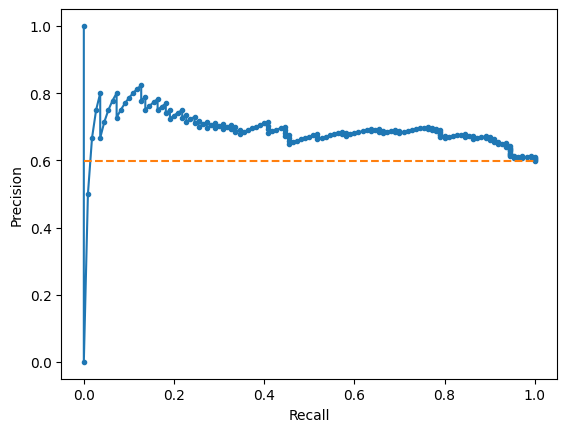

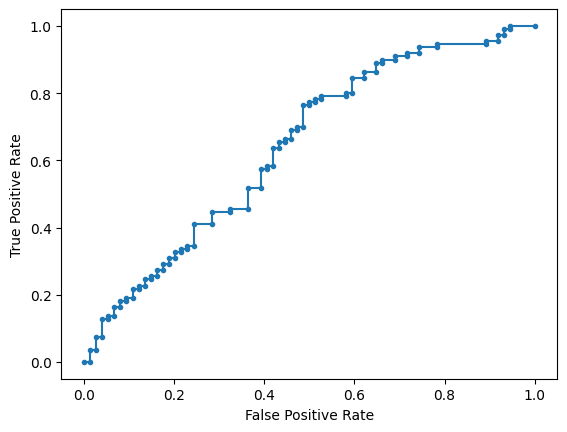

Accuracy: 67.39% Precision: 67.12% Recall: 89.09%
F1: 76.56% MCC: 0.2934
AUPRC: 69.03% AUROC: 64.18%
 accuracy [67.3913043478261]
 precision [67.12328767123287]
 recall [89.0909090909091]
 F1 [76.56250000000001]
 MCC [0.29344484322636943]
 AUPRC [69.02856784554584]
 AUROC [64.17690417690419]

Training # 2 3
2023-04-29 17:42:08.934617
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.2.3.validation_genes.txt
Discriminator is GMM
Means [-2.791389934270419, -0.48265480933181776]
Variances [2.14336642 1.90014446]
Priors [0.47283403 0.52716597]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 0 0 1 1 1 1 1 1 1 1 1]
Train 1:0 430:356 54.71%
Computed class weights: {0: 1.103932584269663, 1: 0.913953488372093}
Valid 1:0 131:91 59.01%
FIT


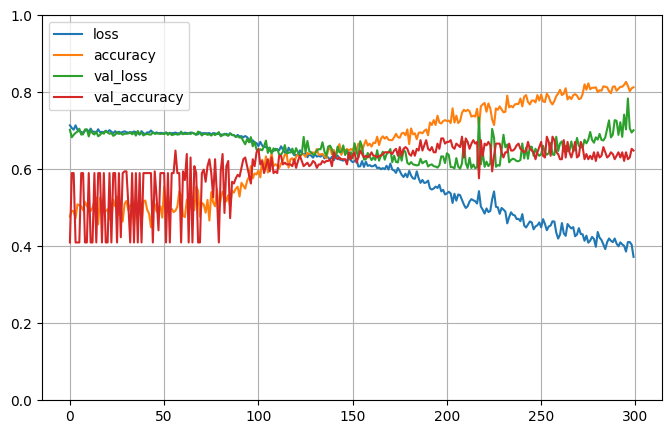


Testing # 2 3
2023-04-29 17:43:00.765644
PREDICT
Test 1:0 131:91 59.01%
Predict 1:0 135:87 60.81%
Test sizes (222, 1025) (222,)
Distrib of scores: 0.5737145 mean 0.30644795 std
Range of scores: 0.0015918548 to 0.99264526
Score threshold 0.5
Confusion matrix
 [[50 41]
 [37 94]]
Normalized matrix
 [[0.22522523 0.18468468]
 [0.16666667 0.42342342]]
Extreme scores correct, pos:neg 77 38
Extreme scores incorrect pos:neg 29 25


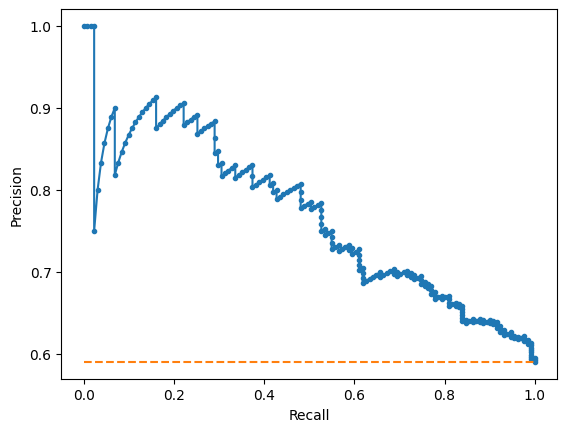

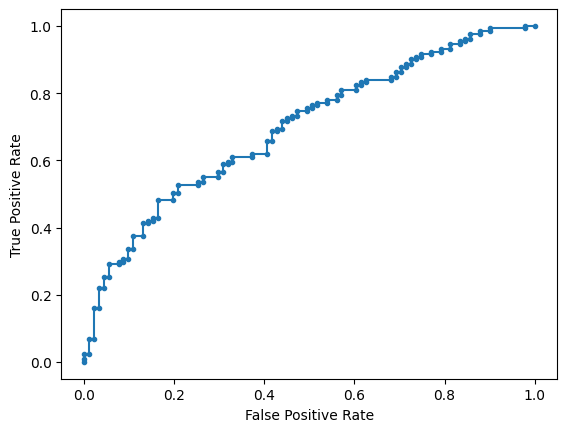

Accuracy: 64.86% Precision: 69.63% Recall: 71.76%
F1: 70.68% MCC: 0.2690
AUPRC: 76.75% AUROC: 69.72%
 accuracy [64.86486486486487]
 precision [69.62962962962963]
 recall [71.7557251908397]
 F1 [70.67669172932331]
 MCC [0.2690009316177148]
 AUPRC [76.74601737954693]
 AUROC [69.71730559516817]

Training # 2 4
2023-04-29 17:43:01.392697
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.2.4.validation_genes.txt
Discriminator is GMM
Means [-2.9012904701928424, -0.37528901660467806]
Variances [2.13961234 1.90051633]
Priors [0.44999569 0.55000431]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 0 0 1 1 1 1 1 1 1 1 1]
Train 1:0 456:332 57.87%
Computed class weights: {0: 1.1867469879518073, 1: 0.8640350877192983}
Valid 1:0 115:105 52.27%
FIT


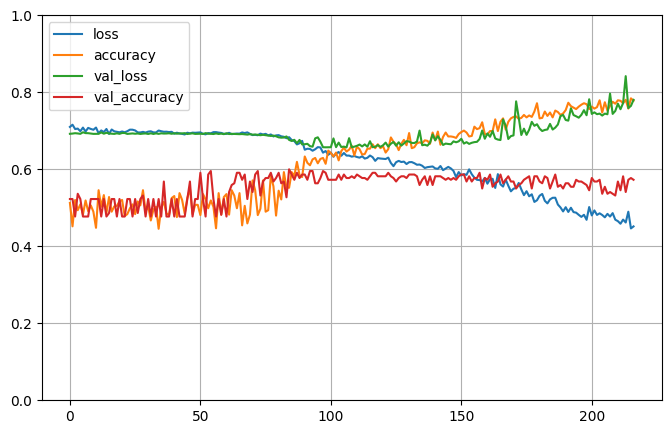


Testing # 2 4
2023-04-29 17:43:44.413971
PREDICT
Test 1:0 115:105 52.27%
Predict 1:0 127:93 57.73%
Test sizes (220, 1025) (220,)
Distrib of scores: 0.5125861 mean 0.15088348 std
Range of scores: 0.10033398 to 0.7752117
Score threshold 0.5
Confusion matrix
 [[54 51]
 [39 76]]
Normalized matrix
 [[0.24545455 0.23181818]
 [0.17727273 0.34545455]]
Extreme scores correct, pos:neg 33 24
Extreme scores incorrect pos:neg 13 9


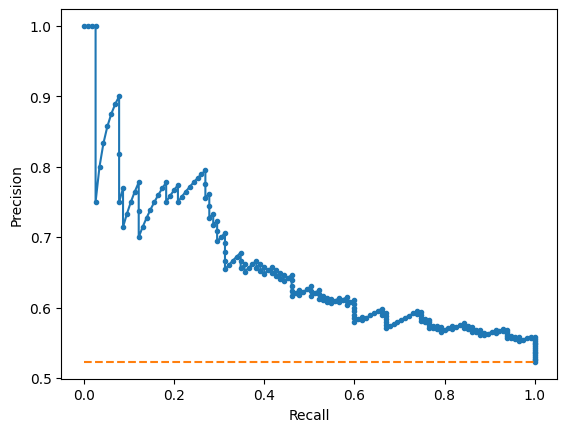

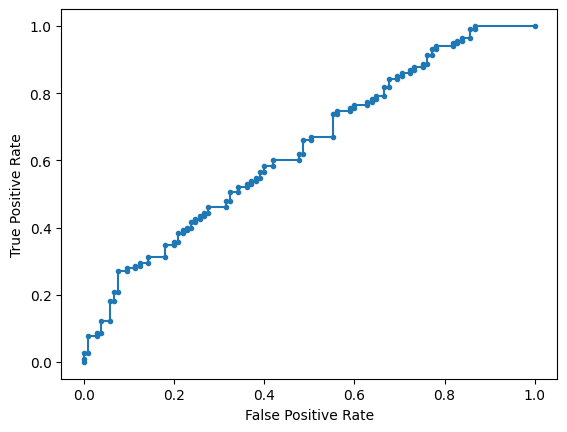

Accuracy: 59.09% Precision: 59.84% Recall: 66.09%
F1: 62.81% MCC: 0.1771
AUPRC: 65.86% AUROC: 63.69%
 accuracy [59.09090909090909]
 precision [59.84251968503938]
 recall [66.08695652173913]
 F1 [62.8099173553719]
 MCC [0.1771020006404738]
 AUPRC [65.85695775745396]
 AUROC [63.6935817805383]

Training # 2 5
2023-04-29 17:43:45.008937
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.2.5.validation_genes.txt
Discriminator is GMM
Means [-2.749395960741711, -0.3663439563352274]
Variances [2.06788335 1.90789987]
Priors [0.49130681 0.50869319]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 0 0 1 1 1 1 1 1 1 1 1]
Train 1:0 429:390 52.38%
Computed class weights: {0: 1.05, 1: 0.9545454545454546}
Valid 1:0 102:87 53.97%
FIT


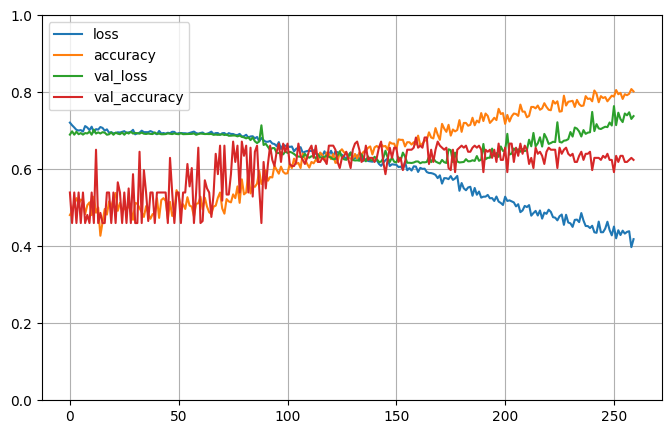


Testing # 2 5
2023-04-29 17:44:28.811189
PREDICT
Test 1:0 102:87 53.97%
Predict 1:0 134:55 70.90%
Test sizes (189, 1025) (189,)
Distrib of scores: 0.5805404 mean 0.16960067 std
Range of scores: 0.11079747 to 0.82922333
Score threshold 0.5
Confusion matrix
 [[41 46]
 [14 88]]
Normalized matrix
 [[0.21693122 0.24338624]
 [0.07407407 0.46560847]]
Extreme scores correct, pos:neg 55 20
Extreme scores incorrect pos:neg 27 1


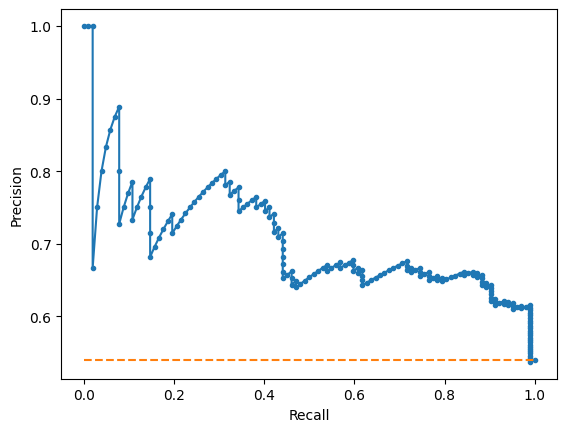

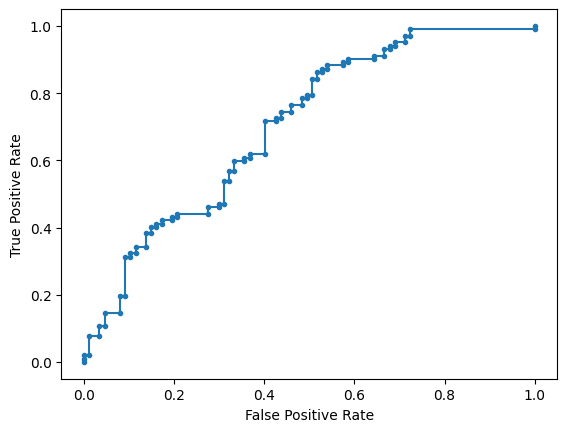

Accuracy: 68.25% Precision: 65.67% Recall: 86.27%
F1: 74.58% MCC: 0.3665
AUPRC: 70.35% AUROC: 70.39%
 accuracy [68.25396825396825]
 precision [65.67164179104478]
 recall [86.27450980392157]
 F1 [74.57627118644066]
 MCC [0.3665090840020966]
 AUPRC [70.34627865780519]
 AUROC [70.38539553752535]
2023-04-29 17:44:29.402896


In [6]:
print(datetime.now())

accuracy=[]
precision=[]
recall=[]
f1=[]
mcc=[]
auprc=[]
auroc=[]

loader = DataLoader(K,ALPHABET)
filepath = DATA_DIR+RCI_FILE_TRAIN
print("Load RCI from",filepath)
gene_to_rci = loader.load_gene_rci_values(filepath,EXCLUSIONS)
print('Num RCI:', len(gene_to_rci.keys()))
filepath = DATA_DIR+SEQ_FILE_TRAIN
print('Load sequence from',filepath)
allids,allseq = loader.load_spectra(filepath)  # for MLP (load_sequence() for CNN)
print('Loaded',len(allseq),'sequences.')
test_gene_to_rci = None
test_allids = None
test_allseq = None
if SEQ_FILE_TEST is not None:
    # Train on the entire train set (no cross-validation).
    # Evaluate with the test files.
    test_loader = DataLoader(K,ALPHABET)
    filepath = DATA_DIR+RCI_FILE_TEST
    print("Load RCI from",filepath)
    test_gene_to_rci = test_loader.load_gene_rci_values(filepath,EXCLUSIONS)
    print('Num RCI:', len(test_gene_to_rci.keys()))
    filepath = DATA_DIR+SEQ_FILE_TEST
    print('Load sequence from',filepath)
    test_allids,test_allseq = test_loader.load_spectra(filepath)
    print('Loaded',len(test_allseq),'sequences.')

for repeat in range(REPEATS):
    for fold in range(FOLDS):
        show_r = repeat+1  # display one-based counting
        show_f = fold+1    # display one-based counting

        print()
        print("Training #",show_r,show_f)
        print(datetime.now())
        builder = ModelBuilder(ALPHABET)
        cvdo = CrossValidator(EPOCHS,RCI_THRESHOLD_VALUE)
        cvdo.set_model_builder(builder)
        cvdo.set_threshold_mechanism(RCI_THRESHOLD_MECHANISM)
        if SEQ_FILE_TEST is None:
            # Train on 80% and evaluate on 20%.
            separator = Separator()
            separator.set_middle(FILTER_TEST,FILTER_TAILS_TEST,FILTER_MIDDLE_TEST,\
                                 FILTER_TRAIN,FILTER_TAILS_TRAIN,FILTER_MIDDLE_TRAIN,\
                                 MIDDLE_LOW,MIDDLE_HIGH)
            separator.load(DATA_DIR,show_r,show_f)
            separator.process(allids,allseq,gene_to_rci)
            train_allids,test_allids = separator.get_ids()
            train_allseq,test_allseq = separator.get_seq()
            train_gene_to_rci,test_gene_to_rci = separator.get_rci()
            cvdo.train_new_model(
                train_allids,train_allseq,train_gene_to_rci,
                test_allids,test_allseq,test_gene_to_rci)
            if SAVE_MODEL_FILENAME is not None:
                filename1 = f"{SAVE_MODEL_FILENAME}.{show_r}.{show_f}.model"
                filename2 = f"{SAVE_DESCRIM_FILENAME}.{show_r}.{show_f}.pickle"
                cvdo.save_model(filename1,filename2)
        else:
            # Train on the entire train set (no cross-validation).
            # Evaluate with the test files.
            train_allids = allids
            train_allseq = allseq
            train_gene_to_rci = gene_to_rci
            BREAK = True
            filename1 = LOAD_MODEL_FILENAME
            filename2 = LOAD_DESCRIM_FILENAME
            cvdo.load_model(filename1,filename2)
            #cvdo.train_new_model(
            #    train_allids,train_allseq,train_gene_to_rci,
            #    None,None,None)

        print()
        print("Testing #",show_r,show_f)
        print(datetime.now())
        cvdo.reset_statistics()
        cvdo.test_without_training(
            test_allids,test_allseq,test_gene_to_rci)
        cv_accuracy,cv_precision,cv_recall,cv_f1,cv_mcc,cv_auprc,cv_auroc=\
            cvdo.get_statistics()

        print(" accuracy" ,  cv_accuracy)
        print(" precision" , cv_precision)
        print(" recall" ,    cv_recall)
        print(" F1" ,        cv_f1)
        print(" MCC" ,       cv_mcc)
        print(" AUPRC" ,     cv_auprc)
        print(" AUROC" ,     cv_auroc)

        accuracy.append(cv_accuracy)
        precision.append(cv_precision)
        recall.append(cv_recall)
        f1.append(cv_f1)
        mcc.append(cv_mcc)
        auprc.append(cv_auprc)
        auroc.append(cv_auroc)
        if BREAK: break
    if BREAK: break
print(datetime.now())

In [7]:
def STD (values):
    # ddof=1 reduces bias when extrapolating from sample to population
    return np.std(values,ddof=1)

print(" accuracy mean %.2f%% std %.2f" %  (np.mean(accuracy),  STD(accuracy)))
print(" precision mean %.2f%% std %.2f" % (np.mean(precision), STD(precision)))
print(" recall mean %.2f%% std %.2f" %    (np.mean(recall),    STD(recall)))
print(" F1 mean %.2f%% std %.2f" %        (np.mean(f1),        STD(f1)))
print(" MCC mean %.4f std %.4f" %       (np.mean(mcc),       STD(mcc)))
print(" AUPRC mean %.2f%% std %.2f" %     (np.mean(auprc),     STD(auprc)))
print(" AUROC mean %.2f%% std %.2f" %     (np.mean(auroc),     STD(auroc)))

print(" accuracy"  , accuracy)
print(" precision" , precision)
print(" recall"    , recall)
print(" F1"        , f1)
print(" MCC"       , mcc)
print(" AUPRC"     , auprc)
print(" AUROC"     , auroc)



 accuracy mean 64.38% std 2.92
 precision mean 65.32% std 3.08
 recall mean 74.76% std 9.26
 F1 mean 69.51% std 5.00
 MCC mean 0.2716 std 0.0523
 AUPRC mean 67.83% std 5.00
 AUROC mean 65.95% std 2.77
 accuracy [[62.68656716417911], [63.44086021505376], [65.27777777777779], [67.45283018867924], [64.24870466321244], [61.13989637305699], [67.3913043478261], [64.86486486486487], [59.09090909090909], [68.25396825396825]]
 precision [[66.3157894736842], [63.06306306306306], [65.3061224489796], [68.84057971014492], [65.89147286821705], [61.46788990825688], [67.12328767123287], [69.62962962962963], [59.84251968503938], [65.67164179104478]]
 recall [[59.43396226415094], [72.16494845360825], [80.0], [78.51239669421489], [77.27272727272727], [67.0], [89.0909090909091], [71.7557251908397], [66.08695652173913], [86.27450980392157]]
 F1 [[62.686567164179095], [67.3076923076923], [71.91011235955055], [73.35907335907336], [71.1297071129707], [64.11483253588517], [76.56250000000001], [70.6766917293233